In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [8]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
print(df.shape)
print(df.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [11]:
print(df.isnull().sum)

<bound method DataFrame.sum of          Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
284802  False  False  False  False  False  False  False  False  False  False   
284803  False  False  False  False  False  False  False  False  False  False   
284804  False  False  False  False  False  False  False  False  False  False   
284805  False  False  False  False  False  False  False  False  False  False   
284806  False  False  False  False  False  False  False  False  False  False   

        

In [17]:
fraud =df[df['Class']==1]
valid=df[df['Class']==0]
outlierfraction=len(fraud)/float(len(valid))
print(outlierfraction)
print('frauddetection:{}'.format(len(df[df['Class']==1])))
print('validtransaction:{}'.format(len(df[df['Class']==0])))

0.0017304750013189597
frauddetection:492
validtransaction:284315


In [18]:
print('Amount description')
fraud.Amount.describe()

Amount description


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [19]:
print('valid transacation desccription')
valid.Amount.describe()

valid transacation desccription


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


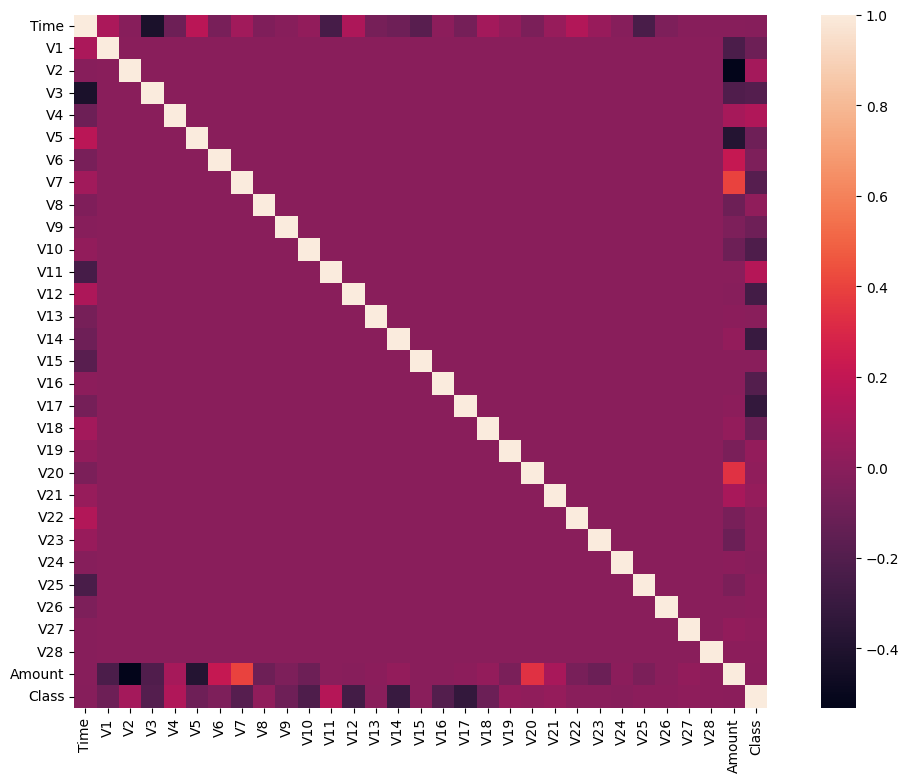

In [22]:
datacorr=df.corr()
plt.figure(figsize=(14,9))
sns.heatmap(datacorr,square=True)
plt.show()

<ipython-input-42-22019ea3d573>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['Amount'],palette='rainbow')


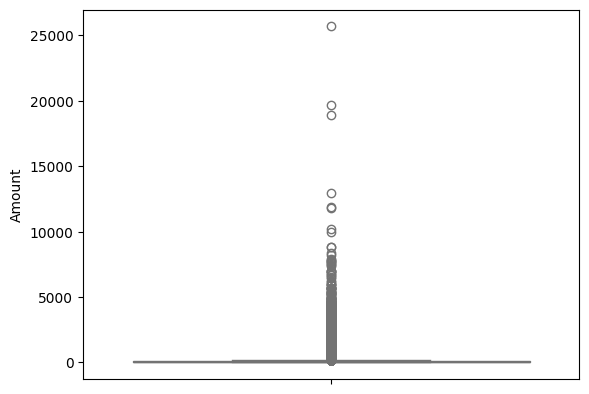

In [42]:
sns.boxplot(df['Amount'],palette='rainbow')
plt.show()

In [25]:
X=df.drop('Class',axis=1)
y=df['Class']
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [27]:
xvalues=X.values
yvalues=y.values

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xvalues,yvalues,test_size=0.2,random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
y_pred=rfc.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef

n_outlier=len(fraud)
n_errors=(y_pred!=y_test).sum()
print("no of outlier:{}".format(n_outlier))
print("no of errors:{}".format(n_errors))

print('random forest classifier is used')

acc=accuracy_score(y_test,y_pred)
print('accuracy score:{}'.format(acc))

prec =precision_score(y_test,y_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test,y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

no of outlier:492
no of errors:24
random forest classifier is used
accuracy score:0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The F1-Score is 0.8636363636363635
The Matthews correlation coefficient is0.8690748763736589


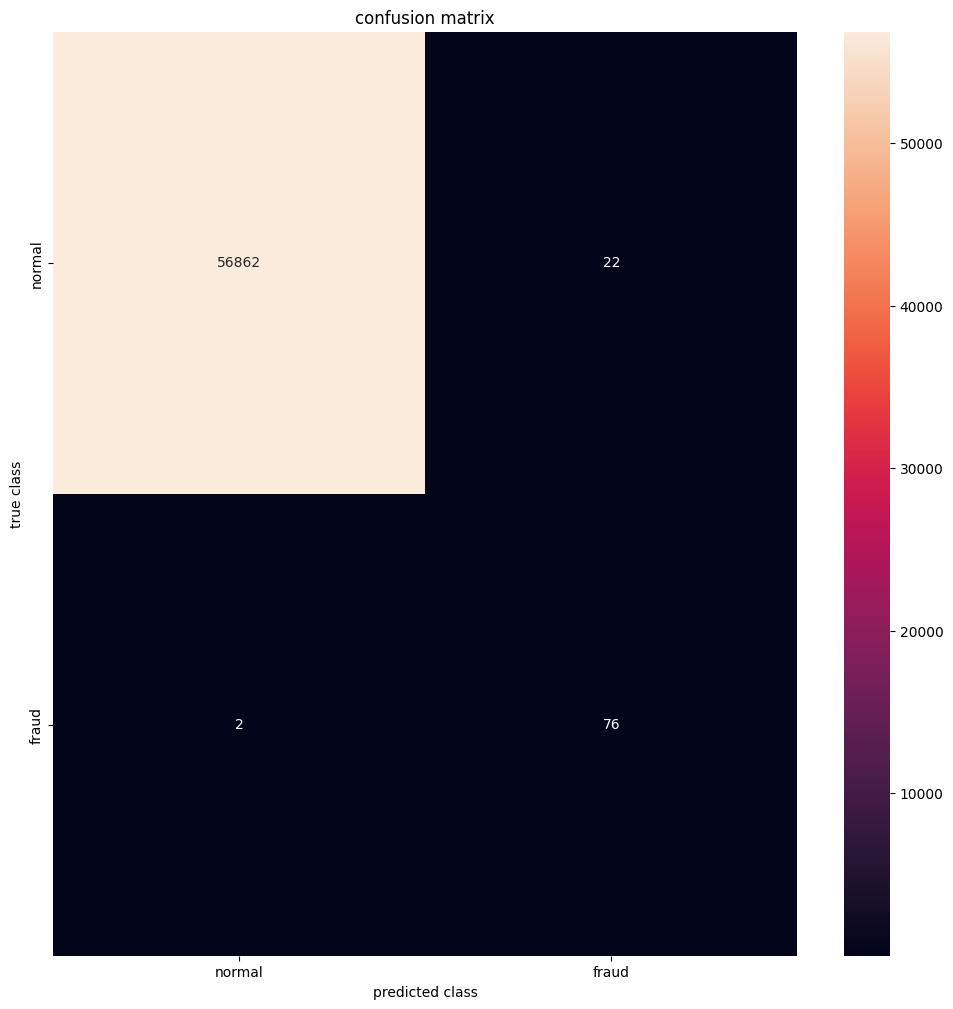

In [41]:
Labels=['normal','fraud']
confumat=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(12,12))
sns.heatmap(confumat,xticklabels=Labels,yticklabels=Labels,annot=True,fmt="d")
plt.title('confusion matrix')
plt.ylabel('true class')
plt.xlabel('predicted class')
plt.show()